In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## Hypothesis: singleton density is depleted by negative selection 

Negative selection acts in two ways: 

1. it turns doubleton sites into singleton sites, tending to increase the singleton count
2. it turns singleton sites into monomorphic sites, tending to decrease the singleton count 

Current studies focus on point (2), correctly inferring that monomorphic sites must increase in number, or, equivalently, polymorphic sites (singleton, doubleton, tripleton, etc) deplete in response to negative selection. 

We went one step further, and asked for the expected effect on singleton count too. 
Since singleton counts are observed to outnumber doubleton sites in typical allele frequency spectra, 
we reasoned that outflux from the singleton category would exceed its influx, leading to a net decrease in singleton count. In our model, this corresponds to `K_bar < 0`. 

## z-scores for SNV density and singleton density, and disease-associated SNP counts, for noncoding trustworthy windows

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following script to compute the z-scores that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

I used the following script to compute the number of disease-associated SNPs (taken from the GWAS catalog) that overlap each Chen et al window:

```
experiments/germline-model/chen-et-al-2022/add-snp-counts.sh
```


In [2]:
import pandas as pd 

def get_chen_mchale_snps():
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.snps.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

chen_mchale_zscores_snps = get_chen_mchale_snps()

chen_mchale_zscores_snps['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores_snps['mchale_K_bar'], errors='coerce')
chen_mchale_zscores_snps = chen_mchale_zscores_snps.dropna()
chen_mchale_zscores_snps.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count
count,2.576570e+05,2.576570e+05,257657.000000,2.576570e+05,2.576570e+05,2.576570e+05,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000
mean,8.211134e+07,8.211234e+07,-0.626094,8.211133e+07,8.211233e+07,8.211183e+07,-0.123734,200.369856,0.014211,106.131151,200.362257,950.818324,0.063705
std,5.472855e+07,5.472855e+07,2.083320,5.472855e+07,5.472855e+07,5.472855e+07,2.210617,30.452046,0.982519,16.225943,30.449610,28.926395,0.271385
min,5.220000e+05,5.230000e+05,-9.994907,5.220890e+05,5.230900e+05,5.225890e+05,-9.121771,128.000000,-4.776766,53.000000,128.000000,901.000000,0.000000
25%,3.723900e+07,3.724000e+07,-1.765699,3.723909e+07,3.724009e+07,3.723959e+07,-1.546801,181.000000,-0.639530,95.000000,181.000000,926.000000,0.000000
50%,7.400700e+07,7.400800e+07,-0.487689,7.400709e+07,7.400809e+07,7.400759e+07,-0.447569,196.000000,0.028681,104.000000,196.000000,951.000000,0.000000
75%,1.163670e+08,1.163680e+08,0.696284,1.163669e+08,1.163679e+08,1.163674e+08,0.852049,214.000000,0.687698,115.000000,214.000000,976.000000,0.000000
max,2.483380e+08,2.483390e+08,9.924837,2.483380e+08,2.483390e+08,2.483385e+08,18.372572,431.000000,4.560088,234.000000,431.000000,1000.000000,8.000000


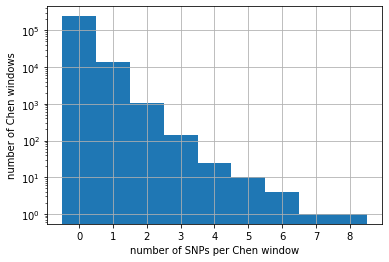

In [3]:
import numpy as np 

axis = chen_mchale_zscores_snps['chen_snp_count'].hist(bins=np.arange(-0.5, 9.5, 1))
axis.set_yscale('log')
axis.set_xlabel('number of SNPs per Chen window')
axis.set_ylabel('number of Chen windows')
_ = axis.set_xticks(np.arange(0, 9, step=1))

In [4]:
chen_mchale_zscores_snps['chen_at_least_one_snp'] = chen_mchale_zscores_snps['chen_snp_count'] > 0
chen_mchale_zscores_snps

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count,chen_at_least_one_snp
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.170831,146,296,915,0,False
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.159818,132,264,941,0,False
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.427748,152,319,942,0,False
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.721886,141,301,997,0,False
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.322700,119,263,921,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916,0,False
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930,0,False
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931,1,True
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932,0,False


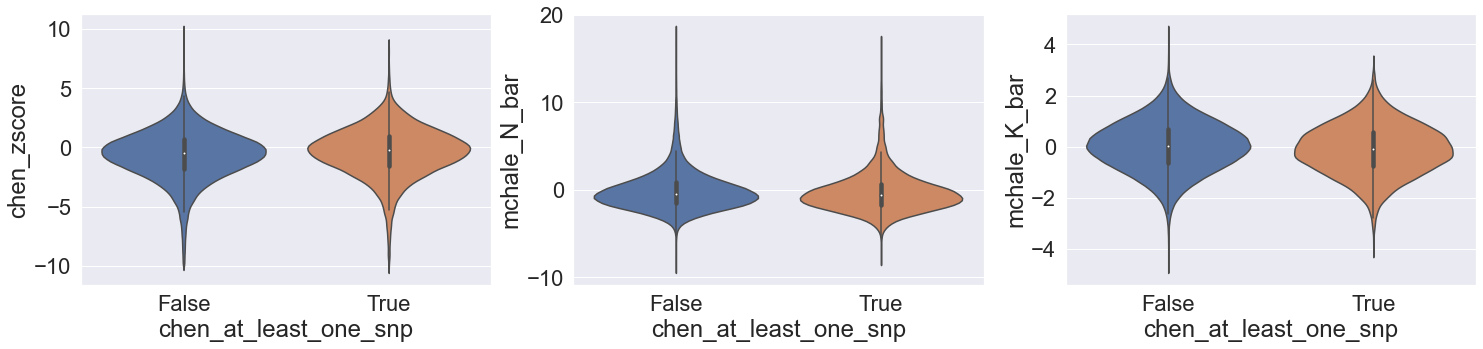

In [5]:
# the fact the two distributions in the following violin plots are largely overlapping
# suggests that a classifier built using any of these z-scores will have low precision and recall 

import seaborn as sns
sns.set(font_scale = 2)

import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i, y in enumerate(['chen_zscore', 'mchale_N_bar', 'mchale_K_bar']):
    sns.violinplot(
        data=chen_mchale_zscores_snps, 
        y=y, 
        x="chen_at_least_one_snp",
        ax=axs[i]
    )

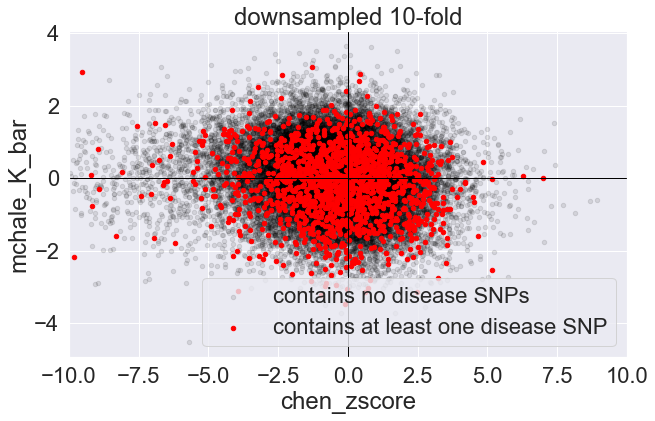

In [6]:
def scatter_plot(step_size=1): 
    df = chen_mchale_zscores_snps.iloc[::step_size, :]
        
    df_false = df[
        df['chen_at_least_one_snp'] == False
#         df['predicted_label'] == False
    ]
    df_true = df[
        df['chen_at_least_one_snp'] == True
#         df['predicted_label'] == True
    ]
    
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))

    axis = df_false.plot.scatter(
        x = 'chen_zscore',
        y = 'mchale_K_bar',
        c = 'black',
        alpha = 0.1,
        ax = axis,
        label = 'contains no disease SNPs'
    )

    axis = df_true.plot.scatter(
        x = 'chen_zscore',
        y = 'mchale_K_bar',
        c = 'red',
        alpha = 1,
        ax = axis,
        label = 'contains at least one disease SNP'        
    )

    axis.set_xlim(-10, 10)
#     axis.set_ylim(-10, 10)
    plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

# the fact that the two joint distributions in the following plot are largely overlapping, 
# suggests a classifer that uses both zscores will have low precision and recall 
scatter_plot(step_size=10)

In [7]:
def compute_bins(number_bins, z_min=-5, z_max=5): 
    bin_width = (z_max - z_min)/number_bins
    bins = np.arange(z_min, z_max+0.5*bin_width, bin_width)
    return bins
    
def aggregate_2d(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]}_bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    df[f'{y["column"]}_bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))

    grouped_windows = df.groupby([f'{x["column"]}_bin', f'{y["column"]}_bin'])
    
    sample_mean = aggregate_2d(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate_2d(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'snp_enrichment':
        heat_map = sample_mean 
        heat_map_colorbar_label = z['snp_enrichment_label']
    elif heat_map_type == 'snp_enrichment_fractional_error': 
        heat_map = standard_error_of_mean/sample_mean
        heat_map_colorbar_label = z['fractional_error_label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = None, 
        annot = True, 
        fmt = '.3f', 
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
       
def plot_heat_maps(x_number_of_bins, y_number_of_bins, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    with sns.axes_style("white"):        
        fig, axs = plt.subplots(1, 2, figsize=(25,5))
        for i, heat_map_type in enumerate(['snp_enrichment', 'snp_enrichment_fractional_error']):
            plot_heat_map(
                df = chen_mchale_zscores_snps,
                x = {
                    'column': 'chen_zscore',
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'chen_at_least_one_snp',
                    'snp_enrichment_label': 'fraction of Chen windows that have at least one disease SNP',
                    'fractional_error_label': 'fractional error of disease-SNP enrichment'
                },
                count_threshold = 2e3,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )

## Chen's z-score appears to explain more of the variance in disease-associated SNP fraction than McHale's N_bar (c.f. Fig 3a of Chen et al 2022)

This is expected since Chen's z-score uses something very close to McHale's N_bar, and also other features (recombination rate, nucleosome density, methylation level, etc). 

Note also the correlation between the z-scores, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb 
```



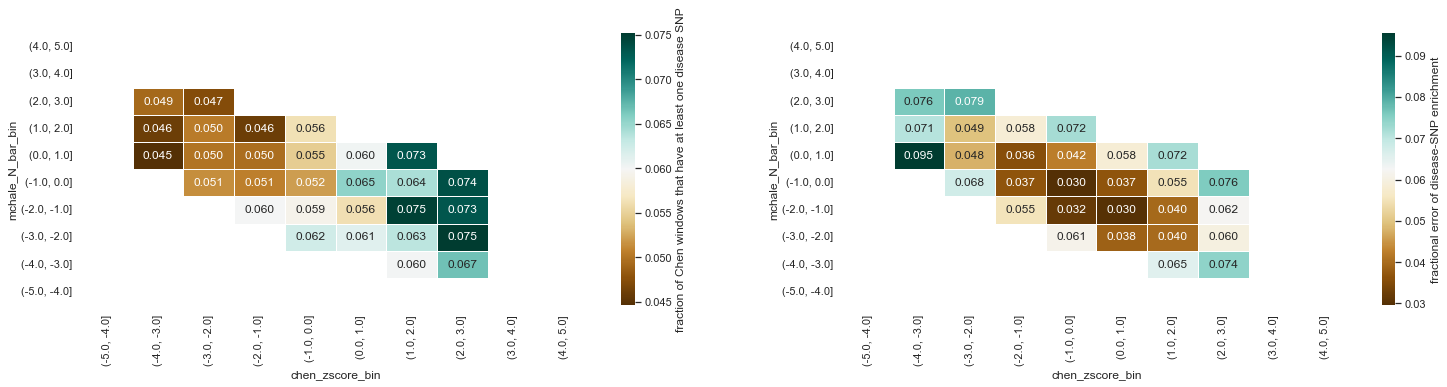

In [8]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_N_bar'
)

## McHale's K_bar in conjunction with Chen's z-score appears to explain more of the variance in disease-SNP fraction than Chen's z-score can by itself 

Note the absence of correlation between mchale_K_bar and chen_zscore, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb
```


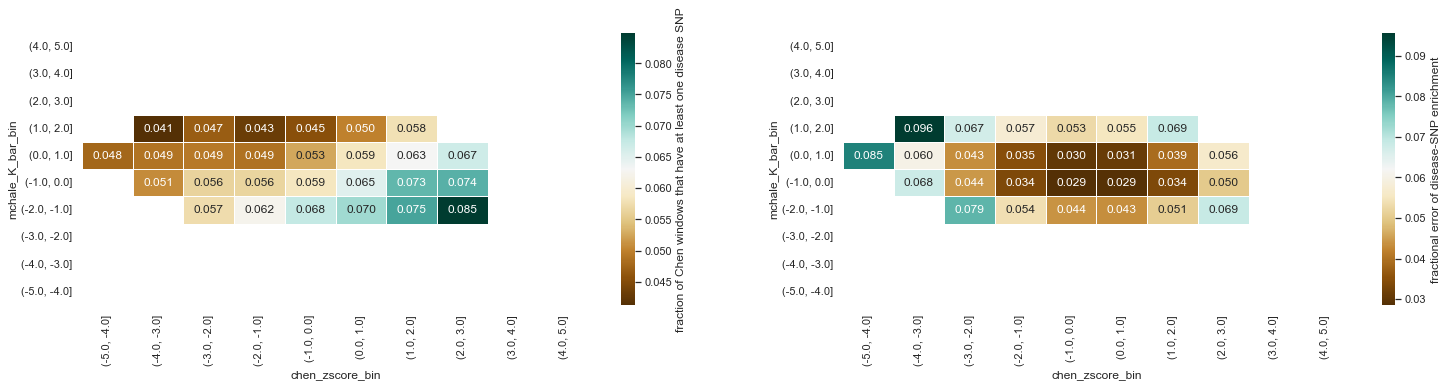

In [9]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_K_bar'
)

## Windows, stratified by z-scores, for manual inspection 

The following windows were visually inspected in the UCSD genome browser and the gnomad browser. No obvious artifacts were found. 

In [10]:
chen_mchale_zscores_snps[
    (chen_mchale_zscores_snps['mchale_K_bar'] < -2.5) 
    &
    (chen_mchale_zscores_snps['chen_zscore'] > 5)
]

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count,chen_at_least_one_snp,chen_zscore_bin,mchale_N_bar_bin,mchale_K_bar_bin
22408,chr10,11930000,11931000,5.752245,11929985,11930986,11930485,-0.739993,199,-2.714495,84,199,986,0,False,NaN,"(-1.0, 0.0]","(-3.0, -2.0]"
72961,chr14,65275000,65276000,5.036654,65274918,65275919,65275418,-2.540793,186,-2.730342,79,186,919,0,False,NaN,"(-3.0, -2.0]","(-3.0, -2.0]"
81078,chr15,67577000,67578000,5.003532,67577022,67578023,67577522,-2.145219,190,-2.562734,82,190,978,0,False,NaN,"(-3.0, -2.0]","(-3.0, -2.0]"
93123,chr17,30475000,30476000,5.156716,30474933,30475934,30475433,-3.306027,155,-2.510398,68,155,934,0,False,NaN,"(-4.0, -3.0]","(-3.0, -2.0]"
203643,chr6,32224000,32225000,5.153436,32224067,32225068,32224567,-4.561665,144,-2.528073,62,144,933,1,True,NaN,"(-5.0, -4.0]","(-3.0, -2.0]"
203651,chr6,32399000,32400000,6.093476,32398921,32399922,32399421,-3.366866,154,-3.285011,62,154,922,1,True,NaN,"(-4.0, -3.0]","(-4.0, -3.0]"


In [11]:
chen_mchale_zscores_snps.sample(5)

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count,chen_at_least_one_snp,chen_zscore_bin,mchale_N_bar_bin,mchale_K_bar_bin
71624,chr14,51977000,51978000,0.270392,51976966,51977967,51977466,-2.386346,173,-0.465864,90,173,967,0,False,"(0.0, 1.0]","(-3.0, -2.0]","(-1.0, 0.0]"
25873,chr10,52139000,52140000,0.030553,52138910,52139911,52139410,-0.956999,190,-0.463490,98,190,911,0,False,"(0.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]"
20847,chr1,242816000,242817000,-1.391558,242815934,242816935,242816434,0.303601,208,0.349544,113,208,935,0,False,"(-2.0, -1.0]","(0.0, 1.0]","(0.0, 1.0]"
146218,chr3,23823000,23824000,4.567115,23822901,23823902,23823401,-1.529575,179,-0.421207,93,179,902,0,False,"(4.0, 5.0]","(-2.0, -1.0]","(-1.0, 0.0]"
46609,chr11,132696000,132697000,-1.393818,132695907,132696908,132696407,1.814494,213,0.091643,113,213,908,0,False,"(-2.0, -1.0]","(1.0, 2.0]","(0.0, 1.0]"


In [12]:
chen_mchale_zscores_snps[
    (chen_mchale_zscores_snps['mchale_K_bar'] > 2.5) 
    &
    (chen_mchale_zscores_snps['chen_zscore'] < -8)
]

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count,chen_at_least_one_snp,chen_zscore_bin,mchale_N_bar_bin,mchale_K_bar_bin
23481,chr10,22713000,22714000,-9.928577,22712916,22713917,22713416,-4.255514,271,2.729517,166,271,917,0,False,NaN,"(-5.0, -4.0]","(2.0, 3.0]"
86961,chr16,35855000,35856000,-9.214889,35855097,35856098,35855597,9.665267,329,2.546534,195,329,903,0,False,NaN,NaN,"(2.0, 3.0]"
105679,chr19,15330000,15331000,-9.513189,15329951,15330952,15330451,5.161538,304,2.938069,189,304,952,1,True,NaN,NaN,"(2.0, 3.0]"
138629,chr21,17298000,17299000,-8.088307,17298032,17299033,17298532,10.071227,333,2.576279,196,333,968,0,False,NaN,NaN,"(2.0, 3.0]"
156012,chr3,121065000,121066000,-8.434678,121065074,121066075,121065574,6.505284,284,2.672909,174,284,926,0,False,NaN,NaN,"(2.0, 3.0]"
169910,chr4,63155000,63156000,-8.461102,63155041,63156042,63155541,9.199845,314,2.638463,189,314,959,0,False,NaN,NaN,"(2.0, 3.0]"
248564,chr9,16373000,16374000,-8.576840,16373060,16374061,16373560,7.812245,310,2.720822,187,310,940,0,False,NaN,NaN,"(2.0, 3.0]"


## Why this is a model-selection exercise, and not just a goodness-of-fit test

One could use Analysis of Variance/F-test approaches to quantify and support the assertion that SNV and singleton counts together explain more of the variation in constraint than SNV counts alone. See, e.g., Section 10.6 of Probability and Statistics for Engineers and Scientists, 4th edition, by Sheldon Ross. 

Ultimately, though, we wish to demonstrate that considering SNV density and singleton density leads to a more *predictive* 
model of constraint than using SNV density alone. Note, though, that the models we construct are not predictive in a practical sense, as no z-score bin has greater than about 8% of its windows in the disease-SNP class. Another way to see this is to note that the distributions of z-scores, conditioned on each class (contains disease-SNP or not), overlap considerably, resulting in very poor recall and FDR, as quantified by the following confusion matrix for a bare-bones classifier: 





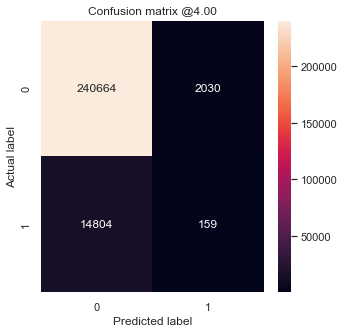

In [13]:
# baseline classifier

from sklearn.metrics import confusion_matrix

def plot_cm(labels, zscores, threshold=4):
    cm = confusion_matrix(labels, zscores > threshold)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_cm(
    labels=np.array(chen_mchale_zscores_snps['chen_at_least_one_snp'].astype(int)), 
    zscores=np.array(chen_mchale_zscores_snps['chen_zscore']), 
    threshold=4
)

**Nevertheless, a model that predicts the probability that a window is constrained is useful, 
as one can meaningfully rank variants by the predicted probabilities of the windows they lie in.**

Consequently, we choose to formulate the problem as an example of model selection, 
as described below. 
(The F test, mentioned above, is actually a special case of the much more general likelihood ratio test, which we use below to select models, c.f., p9 of https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/10/lecture-10.pdf)

## A Gaussian Naive-Bayes model 

We fit a Naive-Bayes model in which the likelihood is assumed to be Gaussian, with 
independent features `mchale_K_bar` and `chen_zscore`. (For more on Gaussian Naive Bayes, see https://gist.github.com/petermchale/1bea6046d657a5511be301e724159408 ) 

The estimated parameters show that the mean of the joint distribution of `mchale_K_bar` and `chen_zscore` for windows harboring a disease SNP is shifted to the left and down relative to that for windows not harboring a disease SNP, consistent with our heat map showing that the probability of harboring a disease SNP increases with increasing `chen_zscore` and decreasing `mchale_K_bar`. 

The predicted probabilites under the model have magnitudes and contours (as a function of `chen_zscore` and `mchale_K_bar`)
that are
consistent with the heat map shown above. 

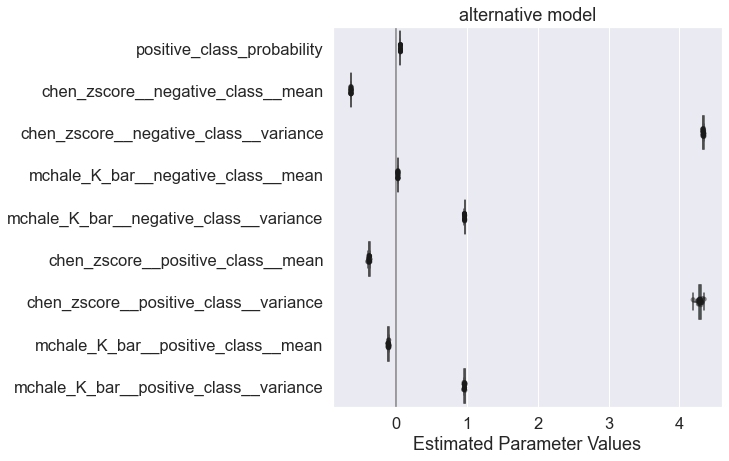

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

sns.set(font_scale = 1.5)    

def compute_X(predictors): 
    X = chen_mchale_zscores_snps[predictors]
    return X

def compute_y(): 
    return chen_mchale_zscores_snps['chen_at_least_one_snp']
   
from sklearn.preprocessing import FunctionTransformer

def compute_pipe(): 
    # naive bayes: 
    # https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
    # https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

    # mean removal and variance scaling
    # https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
    
    # identity transform: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html    

    # return make_pipeline(StandardScaler(), GaussianNB())
    return make_pipeline(FunctionTransformer(), GaussianNB())

def compute_pipe_X_y(predictors): 
    X = compute_X(predictors)
    y = compute_y()
    pipe = compute_pipe()  
    return pipe, X, y

def get_estimated_parameter_values(gaussian_naive_bayes_model, predictors, classes=['negative', 'positive']): 
    parameter_values = [gaussian_naive_bayes_model.class_prior_[1]]
    for i, class_ in enumerate(classes): 
        for j, predictor in enumerate(predictors): 
            parameter_values += [gaussian_naive_bayes_model.theta_[i,j], gaussian_naive_bayes_model.var_[i,j]]
    return parameter_values
    
def get_estimated_parameter_names(predictors, classes=['negative', 'positive']): 
    parameter_names = ['positive_class_probability']
    for i, class_ in enumerate(classes): 
        for j, predictor in enumerate(predictors): 
            parameter_names += [f'{predictor}__{class_}_class__mean', f'{predictor}__{class_}_class__variance'] 
    return parameter_names 

def plot_estimated_parameters(predictors, title): 
    pipe, X, y = compute_pipe_X_y(predictors)
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
    cv_output = cross_validate(
        pipe,
        X,
        y,
        cv=cv,
        return_estimator=True,
        n_jobs=-1, # n_jobs = -1 means using all processors
    )
    models = cv_output["estimator"]

    # https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients
    # NOTE: another approach to computing feature importance is: https://scikit-learn.org/stable/modules/permutation_importance.html
    estimated_parameters = pd.DataFrame(
        [
            get_estimated_parameter_values(model.get_params()['gaussiannb'], predictors) 
            for model in models
        ],
        columns=get_estimated_parameter_names(predictors),
    )

    plt.figure(figsize=(9, 7))
    sns.stripplot(data=estimated_parameters, orient="h", color="k", alpha=0.5)
    sns.boxplot(data=estimated_parameters, orient="h", color="cyan", saturation=0.5, whis=10)
    plt.axvline(x=0, color=".5")
    plt.xlabel("Estimated Parameter Values")
    plt.subplots_adjust(left=0.3)
    plt.title(title)

plot_estimated_parameters(
    predictors=[
        'chen_zscore',
        'mchale_K_bar'
    ],
    title='alternative model'
)


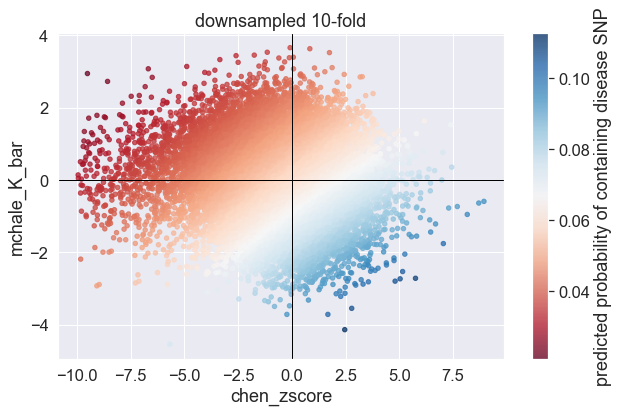

In [15]:
def plot_predicted_probabilities(predictors, step_size):
    pipe, X, y = compute_pipe_X_y(predictors)
    pipe.fit(X, y)

    X_2d = compute_X(predictors=[
        'chen_zscore',
        'mchale_K_bar'
    ])
    X_2d = X_2d.iloc[::step_size, :]
    
    predicted_probabilites = pipe.predict_proba(X_2d[predictors])

    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    plt.scatter(X_2d['chen_zscore'], X_2d['mchale_K_bar'], c=predicted_probabilites[:,1], s=20, cmap='RdBu', alpha=0.75) 
    plt.xlabel('chen_zscore')
    plt.ylabel('mchale_K_bar')
    cbar = plt.colorbar()
    cbar.set_label('predicted probability of containing disease SNP')
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')
    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')
    plt.show() 
    
plot_predicted_probabilities(
    predictors=[
        'chen_zscore',
        'mchale_K_bar'
    ],
    step_size=10
)

## A simpler Gaussian Naive-Bayes model

The model above uses two features: `chen_zscore` and `mchale_K_bar`. We next consider a Gaussian Naive-Bayes model 
using just one feature: `chen_zscore`. 

Fitting this model yields similar values for the parameters shared by both models,
but the contours of the predicted probability surface are qualitatively different from 
those of the heat map shown above. 




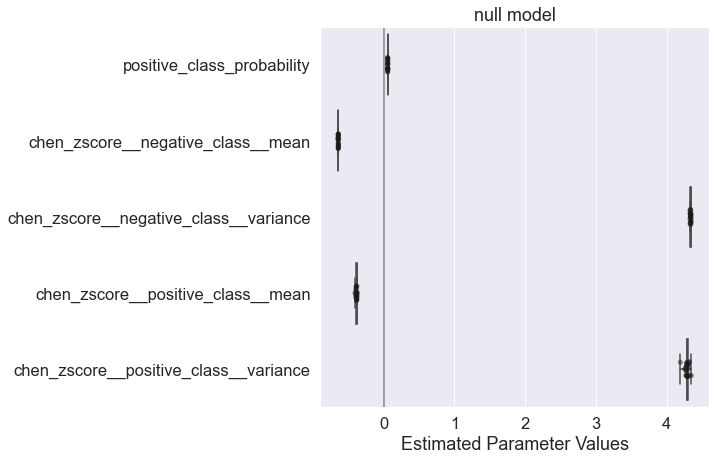

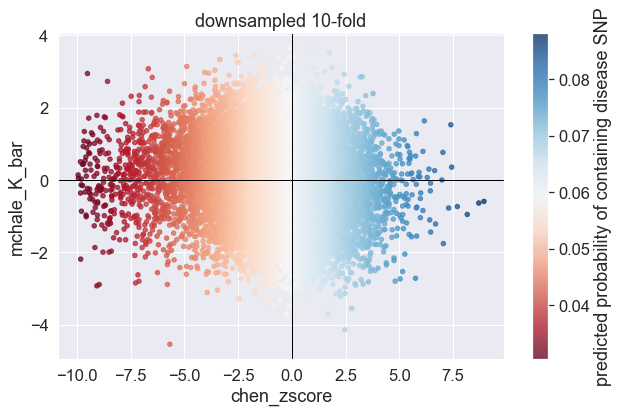

In [16]:
plot_estimated_parameters(
    predictors=['chen_zscore'],
    title='null model'
)

plot_predicted_probabilities(
    predictors=[
        'chen_zscore',
    ],
    step_size=10
)

## Neither model is overfit

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(predictors):  
    pipe, X, y = compute_pipe_X_y(predictors)
    pipe.fit(X, y)

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # shuffle=True: https://stackoverflow.com/a/52368329
    train_sizes, train_scores, test_scores = learning_curve(
        pipe, 
        X, 
        y, 
        scoring='neg_log_loss', 
        shuffle=True, 
        train_sizes=[
        100,
        200, 
        500, 
        750,
        1000, 
        2000, 
        5000,
        7000,
        10000, 
        20000,
        50000,
        80000,
        100000,
        150000,
        200000
    ])
    # average over cross validation folds:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 
             'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 
             'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training set size")
    plt.ylabel('Log likelihood per example')

    plt.legend(loc="best")
    plt.xscale('log')


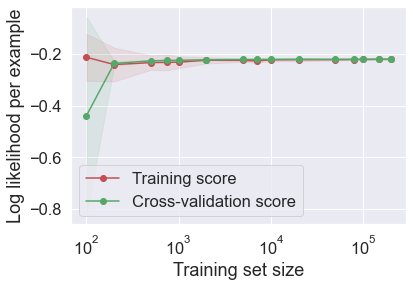

In [18]:
# null model 
plot_learning_curve(predictors=['chen_zscore'])

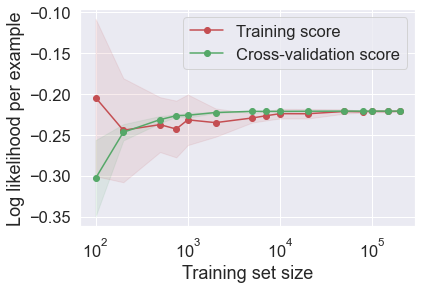

In [19]:
# alternative model 
plot_learning_curve(predictors=[
    'chen_zscore',
    'mchale_K_bar'
])

## The null model (using just `x = chen_zscore`) is a constrained version of the alternative model (using both `x = chen_zscore` and `y = mchale_K_bar`)

Under the assumption of "naive" conditional independence, the alternative model is: 

$$ 
p(l | x, y) = \frac{p(x | l) p(y | l) p(l)}{\sum_{m} p(x | m) p(y | m) p(m)}
$$

where $l$ and $m$ denote class labels. 

If we further assume that the distributions of $y$ for each label coincide, 

$$ 
p(y | l) = f(y),
$$ 

then $f(y)$ cancels in the numerator and denominator of the first equation, leaving: 

$$ 
p(l | x, y) = \frac{p(x | l) p(l)}{p(x)} = p(l | x), 
$$

which is the null model. 


## The Likelihood Ratio Test shows that the general model fits the data significantly better than the nested model

Since the null model is a constrained version of the alternative model, we may apply the Likelihood Ratio Test,
c.f. https://gist.github.com/petermchale/5272f54dd51a1b6d51c41f9bbda6b56d

The p-value reported below is highly significant, 
indicating that the alternative model fits the data significantly better than the null model, 
and therefore should be preferred when using predicted probabilites to rank variants. 

In [20]:
from scipy.stats import chi2
from sklearn.metrics import log_loss

def compute_pvalue_core(features_alternate, features_null, labels, model):
    # based upon: 
    # https://gist.github.com/rnowling/ec9c9038e492d55ffae2ae257aa4acd9
    
    features_alternate = np.array(features_alternate)
    features_null = np.array(features_null)
    labels = np.array(labels)
 
    if features_null.shape[1] >= features_alternate.shape[1]:
        raise ValueError("Alternate features must have more features than null features")

    model.fit(features_alternate, labels)
    alternate_probabilities = model.predict_proba(features_alternate)[:, 1]

    model.fit(features_null, labels)
    null_probabilities = model.predict_proba(features_null)[:, 1]    
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
    alternate_maximum_log_likelihood = -log_loss(labels, alternate_probabilities, normalize=False)
    null_maximum_log_likelihood = -log_loss(labels, null_probabilities, normalize=False)

    test_statistic = 2 * (alternate_maximum_log_likelihood - null_maximum_log_likelihood)
    print(f'test_statistic: {test_statistic}')

    chi2_degrees_of_freedom = features_alternate.shape[1] - features_null.shape[1]
    
    # chi2.sf is the survival function (also defined as 1 - cdf)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
    p_value = chi2.sf(test_statistic, chi2_degrees_of_freedom)

    return p_value

def compute_pvalue(): 
    X_alternate = compute_X(predictors=[
        'chen_zscore',
        'mchale_K_bar'
    ])
    X_null = compute_X(predictors=[
        'chen_zscore',
    ])
    y = compute_y()
    pipe = compute_pipe()

    return compute_pvalue_core(features_alternate=X_alternate, features_null=X_null, labels=y, model=pipe)
    
print(f'p-value: {compute_pvalue()}')

test_statistic: 203.96632269932888
p-value: 2.8466419766138907e-46


## Choice of model significantly affects window ranking 


In [21]:
def add_predicted_probability_to_dataframe(predictors, model_name):
    pipe, X, y = compute_pipe_X_y(predictors)
    pipe.fit(X, y)
    predicted_probabilities = pipe.predict_proba(X)[:,1]
    root_column_name = f'probability_of_containing_snp_under_{model_name}'
    chen_mchale_zscores_snps[root_column_name] = predicted_probabilities
    
    quantile_name, number_of_quantiles = 'percentile', 100
    chen_mchale_zscores_snps[f'{root_column_name}_{quantile_name}'] = pd.qcut(
        chen_mchale_zscores_snps[root_column_name], 
        number_of_quantiles, 
        labels=False
    )

add_predicted_probability_to_dataframe(
    predictors=[
        'chen_zscore',
        'mchale_K_bar'
    ],
    model_name='alternative_model'
)

add_predicted_probability_to_dataframe(
    predictors=[
        'chen_zscore',
    ],
    model_name='null_model'
)

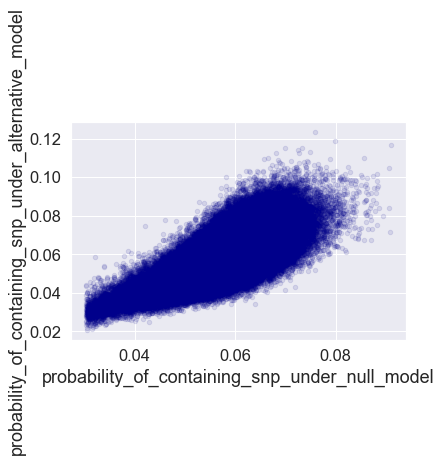

In [22]:
_ = chen_mchale_zscores_snps.plot.scatter(
    x='probability_of_containing_snp_under_null_model',
    y='probability_of_containing_snp_under_alternative_model',
    c='DarkBlue',
    alpha=0.1
)

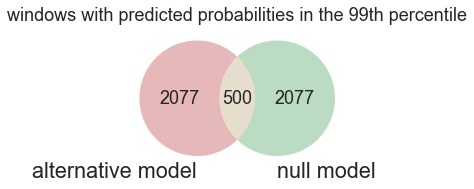

In [23]:
from matplotlib_venn import venn2

percentile = 99

top_ranked_windows_under_alternative_model = chen_mchale_zscores_snps[chen_mchale_zscores_snps['probability_of_containing_snp_under_alternative_model_percentile'] == percentile]
top_ranked_windows_under_null_model = chen_mchale_zscores_snps[chen_mchale_zscores_snps['probability_of_containing_snp_under_null_model_percentile'] == percentile]

ids_of_top_ranked_windows_under_alternative_model = set(top_ranked_windows_under_alternative_model.index)
ids_of_top_ranked_windows_under_null_model = set(top_ranked_windows_under_null_model.index)

plt.figure(figsize=(4,4))
venn2(
    [
        ids_of_top_ranked_windows_under_alternative_model, 
        ids_of_top_ranked_windows_under_null_model
    ], 
    set_labels = (
        'alternative model', 
        'null model'
    )
)
_ = plt.title(f'windows with predicted probabilities in the {percentile}th percentile')


## NOTE 
At some point, we might want to estimate the uncertainty in the predicted probabilities reported by the models, see, e.g., https://www.gatsby.ucl.ac.uk/~balaji/balaji-uncertainty-talk-cifar-dlrl.pdf For now, we assume no uncertainty in the predicted probabilities, and use them to rank windows. 